Import modules and mount the drive


In [73]:
import os
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import tensorflow as tf
from keras.layers import Lambda, Input, Dense
from keras.models import Model, Sequential, load_model
from keras.losses import mse, binary_crossentropy
#from keras.utils import plot_model
from keras import backend as K

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras import losses
from keras.layers import Flatten
from google.colab import drive
drive.mount('/drive')
from tensorflow.python.framework.ops import disable_eager_execution
import importlib

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


Import Dataset from google drive

In [74]:
data = pd.read_csv('/drive/My Drive/Colab Notebooks/Itr_6.csv')
data2 = pd.read_csv('/drive/My Drive/Colab Notebooks/ExperimentalData_2.csv')

In [75]:
data

,Wavelength,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,400,0.054,0.323,0.043,0.541,0.372,0.836,0.402,0.402,0.267,...,0.424,0.442,0.460,0.404,0.555,0.512,0.524,0.401,0.445,0.510
1,405,0.053,0.319,0.043,0.535,0.368,0.795,0.397,0.398,0.264,...,0.420,0.437,0.456,0.400,0.549,0.506,0.518,0.397,0.440,0.504
2,410,0.053,0.316,0.043,0.530,0.365,0.740,0.394,0.394,0.262,...,0.415,0.433,0.451,0.396,0.543,0.501,0.513,0.393,0.436,0.499
3,415,0.052,0.313,0.042,0.526,0.361,0.674,0.391,0.390,0.259,...,0.412,0.429,0.447,0.393,0.538,0.496,0.508,0.390,0.432,0.494
4,420,0.052,0.310,0.042,0.522,0.358,0.606,0.388,0.387,0.257,...,0.409,0.426,0.444,0.390,0.534,0.492,0.504,0.387,0.428,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,880,0.066,0.105,0.055,0.093,0.098,0.056,0.080,0.135,0.063,...,0.165,0.107,0.157,0.097,0.201,0.260,0.249,0.156,0.191,0.303
97,885,0.070,0.104,0.056,0.092,0.096,0.057,0.079,0.131,0.064,...,0.159,0.105,0.150,0.096,0.192,0.246,0.240,0.151,0.184,0.288
98,890,0.068,0.100,0.056,0.090,0.094,0.057,0.078,0.126,0.064,...,0.151,0.102,0.144,0.093,0.179,0.227,0.222,0.143,0.173,0.264
99,895,0.069,0.098,0.057,0.089,0.092,0.058,0.078,0.122,0.064,...,0.146,0.100,0.138,0.092,0.169,0.213,0.208,0.138,0.165,0.245


(96, 101)


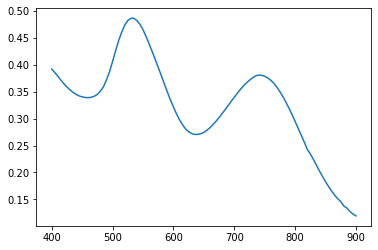

In [76]:
#Data cleaning - dataset 1
clean_data_pre = data.set_index('Wavelength').T
clean_data = data.set_index('Wavelength').T.values
print(clean_data.shape)
plt.plot(clean_data_pre.columns,clean_data_pre.mean())
#Visualize mean curve for dataset 2

In [77]:
#Data cleaning - dataset 2 
clean_data2 = data2.T.set_index(np.array(range(101))).T
clean_data2

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.062167,0.060833,0.059833,0.058833,0.058,0.0575,0.0575,0.057333,0.056833,0.056667,...,0.004,0.0035,0.0035,0.0045,0.003833,0.004667,0.0035,0.003833,0.004,0.003833
1,0.009167,0.008833,0.007833,0.006833,0.006,0.0055,0.0055,0.005333,0.004833,0.004667,...,0.006,0.0065,0.0065,0.0065,0.006833,0.006667,0.0055,0.006833,0.007,0.006833
2,0.092167,0.090833,0.088833,0.086833,0.086,0.0845,0.0845,0.083333,0.082833,0.081667,...,0.009,0.0085,0.0085,0.0085,0.008833,0.008667,0.0085,0.008833,0.008,0.007833
3,0.128167,0.125833,0.123833,0.122833,0.122,0.1205,0.1205,0.119333,0.118833,0.119667,...,0.006,0.0055,0.0055,0.0055,0.005833,0.005667,0.0055,0.005833,0.006,0.005833
4,0.026167,0.024833,0.022833,0.020833,0.020,0.0185,0.0175,0.016333,0.014833,0.013667,...,0.005,0.0045,0.0045,0.0045,0.004833,0.004667,0.0045,0.004833,0.005,0.004833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.071167,0.066833,0.062833,0.059833,0.057,0.0555,0.0535,0.052333,0.048833,0.047667,...,0.050,0.0495,0.0495,0.0495,0.049833,0.044667,0.0565,0.050833,0.051,0.050833
443,0.010167,0.008833,0.006833,0.005833,0.005,0.0045,0.0045,0.004333,0.003833,0.004667,...,0.000,-0.0005,-0.0005,-0.0005,-0.000167,-0.000333,-0.0005,-0.000167,-0.001,-0.001167
444,0.035167,0.031833,0.028833,0.026833,0.025,0.0235,0.0225,0.021333,0.019833,0.019667,...,0.003,0.0025,0.0025,0.0015,0.002833,0.002667,0.0025,0.002833,0.002,0.002833
445,0.054167,0.052833,0.050833,0.048833,0.047,0.0455,0.0445,0.043333,0.041833,0.041667,...,0.032,0.0315,0.0305,0.0305,0.030833,0.030667,0.0305,0.030833,0.031,0.030833


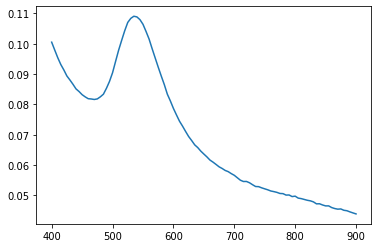

In [78]:
#Visualize mean curve for dataset 2
plt.plot(clean_data_pre.columns,clean_data2.mean().values)

In [79]:
#seperate the data into train dataset and test dataset
sample_train, sample_test = train_test_split(data2, train_size = 0.8, random_state = 6)
#check the size of train/test 
print(sample_train.shape)
print(sample_test.shape)

(357, 101)
(90, 101)


In [80]:
#network parameter
original_dim  = sample_train.shape[1]
input_shape = (original_dim, ) 
intermediate_dim = 128
intermediate_dim_2 = 48
batch_size = 48
latent_dim = 3
epochs = 100

In [81]:
#VAE Model = Encoder + decoder
inputs = Input(shape = input_shape, name = 'encoder_input')
x = Dense(intermediate_dim, activation = 'relu')(inputs)
x = Dense(intermediate_dim_2, activation = 'relu')(x)
z_mean = Dense(latent_dim, name = 'z_mean')(x)
z_log_var = Dense(latent_dim, name = 'z_log_var')(x)

In [82]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape = (batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [83]:
z = Lambda(sampling, output_shape = (latent_dim, ), name = 'z')([z_mean, z_log_var])

In [84]:
encoder = Model(inputs,z_mean)
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 101)]             0         
                                                                 
 dense_15 (Dense)            (None, 128)               13056     
                                                                 
 dense_16 (Dense)            (None, 48)                6192      
                                                                 
 z_mean (Dense)              (None, 3)                 147       
                                                                 
Total params: 19,395
Trainable params: 19,395
Non-trainable params: 0
_________________________________________________________________


In [85]:
#decoder
latent_inputs = Input(shape=(latent_dim,), name = 'z_sampling')
x = Dense(intermediate_dim_2, activation='relu')(latent_inputs)
x = Dense(intermediate_dim, activation='relu')(x)
outputs = Dense(original_dim, activation = 'sigmoid')(x)

decoder = Model(latent_inputs, outputs, name = 'decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 3)]               0         
                                                                 
 dense_17 (Dense)            (None, 48)                192       
                                                                 
 dense_18 (Dense)            (None, 128)               6272      
                                                                 
 dense_19 (Dense)            (None, 101)               13029     
                                                                 
Total params: 19,493
Trainable params: 19,493
Non-trainable params: 0
_________________________________________________________________


In [86]:
outputs = decoder(encoder(inputs))
vae = Model(inputs, outputs, name='vae_mlp')

In [87]:
def loss_fn(x, x_decoded_mean):
    xent_loss = losses.binary_crossentropy(x, x_decoded_mean)
    kl_loss = -0.5 * K.mean(1+z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

In [88]:
vae.compile(optimizer='rmsprop', loss = loss_fn, experimental_run_tf_function=False)
#original optimizer rmsprop

In [89]:
disable_eager_execution()

In [90]:
results = vae.fit(sample_train, sample_train, 
                  shuffle=True, 
                  epochs = epochs, 
                  batch_size = batch_size,
                  validation_data = (sample_test, sample_test))

Train on 357 samples, validate on 90 samples
Epoch 1/100
357/357 [==============================] - 1s 2ms/sample - loss: 0.6882 - val_loss: 0.6657
Epoch 2/100
357/357 [==============================] - 0s 86us/sample - loss: 0.6395 - val_loss: 0.5750
Epoch 3/100
 48/357 [===>..........................] - ETA: 0s - loss: 0.5845

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


357/357 [==============================] - 0s 86us/sample - loss: 0.5275 - val_loss: 0.4204
Epoch 4/100
357/357 [==============================] - 0s 96us/sample - loss: 0.4044 - val_loss: 0.3108
Epoch 5/100
357/357 [==============================] - 0s 97us/sample - loss: 0.3264 - val_loss: 0.2564
Epoch 6/100
357/357 [==============================] - 0s 93us/sample - loss: 0.2883 - val_loss: 0.2157
Epoch 7/100
357/357 [==============================] - 0s 109us/sample - loss: 0.2562 - val_loss: 0.1964
Epoch 8/100
357/357 [==============================] - 0s 139us/sample - loss: 0.2421 - val_loss: 0.1726
Epoch 9/100
357/357 [==============================] - 0s 95us/sample - loss: 0.2255 - val_loss: 0.1598
Epoch 10/100
357/357 [==============================] - 0s 92us/sample - loss: 0.2177 - val_loss: 0.1508
Epoch 11/100
357/357 [==============================] - 0s 105us/sample - loss: 0.2102 - val_loss: 0.1446
Epoch 12/100
357/357 [==============================] - 0s 111us/sample

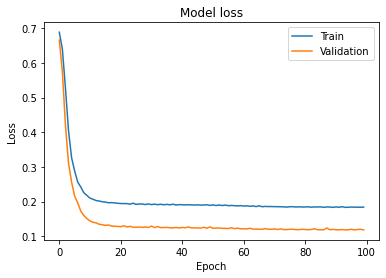

In [91]:
plt.plot(results.history['loss'], label = 'Train')
plt.plot(results.history['val_loss'], label = 'Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')

In [92]:
#save the encoder / decoder model at Google drive
encoder.save('/drive/My Drive/Colab Notebooks/data2_encoder')
decoder.save('/drive/My Drive/Colab Notebooks/data2_decoder')

INFO:tensorflow:Assets written to: /drive/My Drive/Colab Notebooks/data2_encoder/assets
INFO:tensorflow:Assets written to: /drive/My Drive/Colab Notebooks/data2_decoder/assets


In [93]:
#Genrate component function
#latent_dim = 4
def component_plot(decoder_model, encoded_array, latent_vector, std):
    """
    generate mean value data std = 0, 
    generate mean+std value data std = 1, 
    generate mean-std value data std = -1
    """
    copied_array = encoded_array.copy()
    copied_array[:, latent_vector] = copied_array[:, latent_vector] + std * np.std(copied_array, axis=0)[latent_vector]
    mean_latent_array = np.mean(copied_array, axis = 0)
    decoded_all = decoder_model.predict(mean_latent_array.reshape(1,latent_dim), batch_size = batch_size)
    return decoded_all.T

In [94]:
input_data_array = clean_data2.values  #Change the dataset here!
encoded_data = encoder.predict(input_data_array, batch_size = batch_size)
copied_array = encoded_data.copy()
pd.DataFrame(copied_array)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


,0,1,2
0,0.017185,0.052483,-0.023154
1,0.013430,-0.047291,0.005343
2,0.001911,0.043865,-0.008061
3,0.004582,0.070679,-0.022733
4,0.020786,-0.028875,-0.010423
...,...,...,...
442,-0.029928,-0.033238,0.041077
443,0.046974,-0.029071,-0.030919
444,0.012464,-0.013065,-0.005684
445,-0.022410,-0.016793,0.031140


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


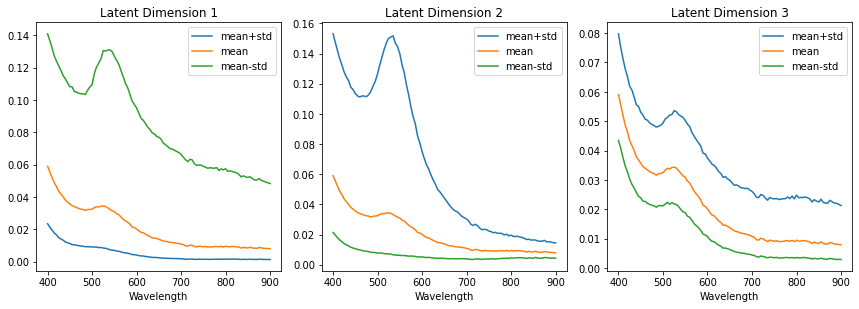

In [95]:
#Generate plot here!!!
#Just input the array you would like to predict!
input_data_array = clean_data2.values  #Change the dataset here!
encoded_data = encoder.predict(input_data_array, batch_size = batch_size)
columns_index = clean_data_pre.columns
data2_figure = plt.figure(figsize = (16, 8))
num_latent_vector = latent_dim
for i in range(num_latent_vector):
    axe = plt.subplot(2, 4, i+1)
    axe.plot(columns_index, component_plot(decoder, encoded_data, i, 1), label = 'mean+std')
    axe.plot(columns_index, component_plot(decoder, encoded_data, i, 0), label = 'mean')
    axe.plot(columns_index, component_plot(decoder, encoded_data, i, -1), label = 'mean-std')
    axe.set_xlabel('Wavelength')
    axe.set_title('Latent Dimension ' + str(i+1))
    plt.legend(loc = 'upper right')
plt.tight_layout()
data2_figure.savefig('/drive/My Drive/Colab Notebooks/data2_figure.png',transparent=True)